# Classification - Breast Cancer Wisconsin (Diagnostic)

[UCI - Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
cancer_data = pd.read_csv('cancer_classification.csv')

In [3]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis

In [4]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Check whether it is well balanced data or not


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

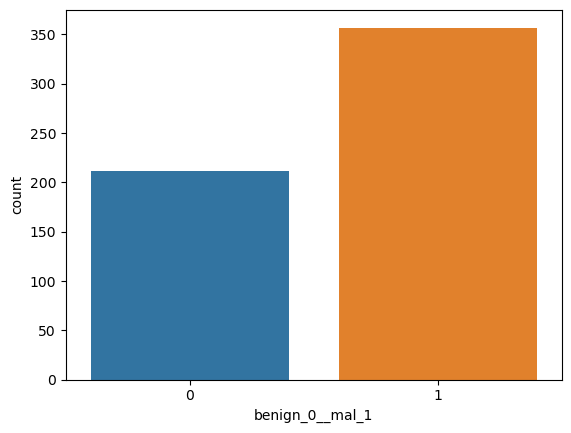

In [6]:
sns.countplot(cancer_data, x = cancer_data['benign_0__mal_1'])

Although cases with 1 is more than 0 cases, the difference is not that extreme.

## Check correlation

<Axes: >

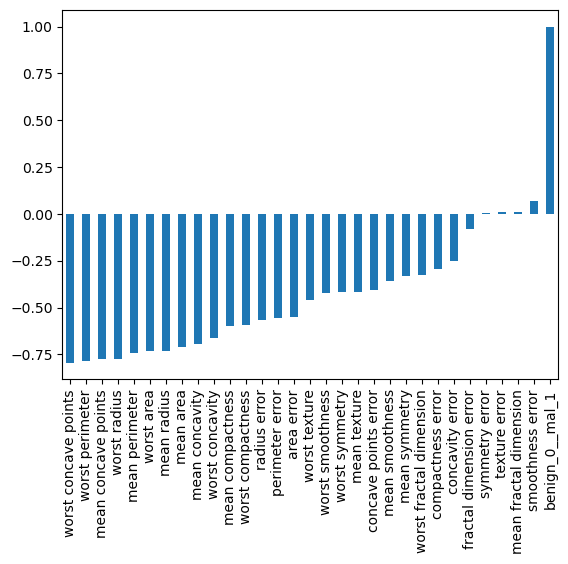

In [7]:
cancer_data.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

# Train Test Split


In [8]:
y = cancer_data['benign_0__mal_1']
cancer_data.drop(columns = ['benign_0__mal_1'], inplace = True)

In [9]:
x = cancer_data.copy()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
x_train.shape

(455, 30)

In [12]:
x_test.shape

(114, 30)

# Scaling Data

In [13]:
sc = MinMaxScaler()

In [14]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Model Building



In [15]:
#model
model = Sequential()

#input & hidden layers
model.add(Dense(units = 40, input_shape=(30,),activation = 'relu'))
model.add(Dense(units = 22, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))

#output layers
model.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [17]:
model.fit(x=x_train_scaled,y = y_train,validation_data=(x_test_scaled,y_test) ,epochs= 200, verbose=1)

Epoch 1/200
15/15 [==============================] - 1s 24ms/step - loss: 0.6312 - val_loss: 0.5786
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5668 - val_loss: 0.5247
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5166 - val_loss: 0.4772
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4654 - val_loss: 0.4169
Epoch 5/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4147 - val_loss: 0.3609
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3611 - val_loss: 0.3139
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3169 - val_loss: 0.2547
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2751 - val_loss: 0.2210
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2435 - val_loss: 0.1945
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2225 - val_loss: 0.1794
Epoch 11

15/15 [==============================] - 0s 5ms/step - loss: 0.0550 - val_loss: 0.0513
Epoch 84/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.0258
Epoch 85/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0563 - val_loss: 0.0241
Epoch 86/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0568 - val_loss: 0.0278
Epoch 87/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.0361
Epoch 88/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0531 - val_loss: 0.0396
Epoch 89/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.0842
Epoch 90/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0548 - val_loss: 0.0216
Epoch 91/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.0243
Epoch 92/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.0237
Epoch 93/200


## Example One: Choosing too many epochs and overfitting!

## Training the Model


In [18]:
model.fit(x=x_train_scaled,y = y_train,validation_data=(x_test_scaled,y_test),epochs= 250, verbose=1)

Epoch 1/250
15/15 [==============================] - 0s 12ms/step - loss: 0.0234 - val_loss: 0.0187
Epoch 2/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0294 - val_loss: 0.0168
Epoch 3/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.1384
Epoch 4/250
15/15 [==============================] - 0s 8ms/step - loss: 0.0245 - val_loss: 0.0150
Epoch 5/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0281
Epoch 6/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.0399
Epoch 7/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.0240
Epoch 8/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.0226
Epoch 9/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0298 - val_loss: 0.0241
Epoch 10/250
15/15 [==============================] - 0s 8ms/step - loss: 0.0234 - val_loss: 0.0507
Epoch 11

Epoch 83/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.0114
Epoch 84/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.0624
Epoch 85/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0149 - val_loss: 0.0102
Epoch 86/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0181
Epoch 87/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0173 - val_loss: 0.0180
Epoch 88/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 89/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.0759
Epoch 90/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0238
Epoch 91/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0169
Epoch 92/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0148 - val_loss: 0.0396


15/15 [==============================] - 0s 7ms/step - loss: 8.3893e-04 - val_loss: 0.0618
Epoch 246/250
15/15 [==============================] - 0s 6ms/step - loss: 8.7163e-04 - val_loss: 0.0407
Epoch 247/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.0846
Epoch 248/250
15/15 [==============================] - 0s 6ms/step - loss: 9.6760e-04 - val_loss: 0.0618
Epoch 249/250
15/15 [==============================] - 0s 6ms/step - loss: 8.2973e-04 - val_loss: 0.0437
Epoch 250/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.1251


## Check history of Training

In [19]:
model.history.history

{'loss': [0.023407429456710815,
  0.029422953724861145,
  0.020735085010528564,
  0.024536527693271637,
  0.026238704100251198,
  0.034056708216667175,
  0.020774275064468384,
  0.02075977250933647,
  0.029750125482678413,
  0.023445336148142815,
  0.01954415999352932,
  0.031224196776747704,
  0.02888854779303074,
  0.021931897848844528,
  0.021603785455226898,
  0.021698590368032455,
  0.01828826032578945,
  0.02475459687411785,
  0.02065240778028965,
  0.026022009551525116,
  0.026074454188346863,
  0.018219174817204475,
  0.01828814297914505,
  0.017122726887464523,
  0.021839186549186707,
  0.026081537827849388,
  0.01983298361301422,
  0.021896908059716225,
  0.018152816221117973,
  0.025078004226088524,
  0.018261414021253586,
  0.027053533121943474,
  0.018124278634786606,
  0.01891295053064823,
  0.018132472410798073,
  0.021631421521306038,
  0.016068272292613983,
  0.015564408153295517,
  0.014647264033555984,
  0.019863039255142212,
  0.018957268446683884,
  0.0212968140840

<Axes: >

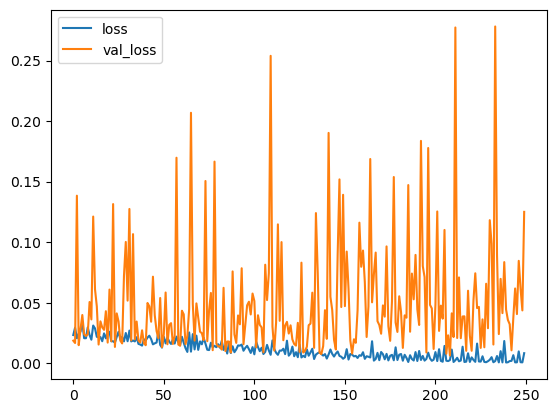

In [20]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

We can see from the chart that our model is definitely OVERFITTING because `val_loss` (orange line) suddenly spikes up after a certain epochs.

val_loss is getting wrose and wrose after a certain point in time.

To avoid this, we can put Early Stopping.

# Model Building (with Early Stopping)


## Example Two: Early Stopping

## Early stopping

Stop training when a monitored quantity has stopped improving.


In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## Model Training with Early Stopping

In [22]:
#fit
model.fit(x=x_train_scaled,
                y = y_train,
                validation_data = (x_test_scaled,y_test),
                epochs= 300,
                verbose=1,
                callbacks = [early_stop])

Epoch 1/300
15/15 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0531
Epoch 2/300
15/15 [==============================] - 0s 6ms/step - loss: 7.3607e-04 - val_loss: 0.0743
Epoch 3/300
15/15 [==============================] - 0s 6ms/step - loss: 9.8909e-04 - val_loss: 0.0078
Epoch 4/300
15/15 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.0565
Epoch 5/300
15/15 [==============================] - 0s 6ms/step - loss: 5.7037e-04 - val_loss: 0.0395
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.2416
Epoch 7/300
15/15 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0634
Epoch 8/300
15/15 [==============================] - 0s 6ms/step - loss: 5.4138e-04 - val_loss: 0.1158
Epoch 9/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0954
Epoch 10/300
15/15 [==============================] - 0s 8ms/step - loss: 4.4824e-04 - val_lo

Now we can see that because of Early Stopping, the model traning got stopped once there is no improvement in training (after 87 epoch).


## Check history of Training (with Early Stopping)

In [23]:
model.history.history

{'loss': [0.0012472362723201513,
  0.0007360673043876886,
  0.0009890921646729112,
  0.0130650969222188,
  0.00057036621728912,
  0.0018999199382960796,
  0.006029472686350346,
  0.0005413797916844487,
  0.004952577408403158,
  0.0004482429358176887,
  0.001683318056166172,
  0.005715776234865189,
  0.0006142292986623943,
  0.0013760600704699755,
  0.0055938237346708775,
  0.0009603906073607504,
  0.0009842815343290567,
  0.004093750845640898,
  0.0006358238752000034,
  0.008448026143014431,
  0.0007318461430259049,
  0.0004565874405670911,
  0.0013537105405703187,
  0.002668286208063364,
  0.001340351765975356,
  0.002625360619276762,
  0.0005473967758007348,
  0.0033137043938040733,
  0.0013000727631151676,
  0.0009524310589767992,
  0.004076027311384678,
  0.000958176446147263,
  0.0005167257040739059,
  0.0019062226638197899,
  0.007796189747750759,
  0.0004881050263065845,
  0.00038645751192234457,
  0.0005949505721218884,
  0.006663125939667225],
 'val_loss': [0.05314424633979797

<Axes: >

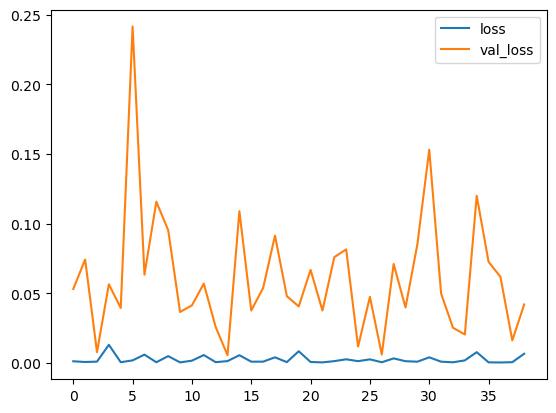

In [24]:
losses_df = pd.DataFrame(model.history.history)
losses_df.plot()

# Model Building (with Adding in DropOut Layers)
* Turn off % of neurons randomly
* `rate`: 0 - 1 (percentage of neurons to be turned off randomly while training on each epoch)

## Example Three: Adding in DropOut Layers

In [25]:
#model
modelWithDO = Sequential()

#input & hidden layers
modelWithDO.add(Dense(units = 30,input_shape=(30,), activation = 'relu'))
modelWithDO.add(Dense(units = 18, activation = 'relu'))
modelWithDO.add(Dropout(rate=0.5))
modelWithDO.add(Dense(units = 10, activation = 'relu'))
modelWithDO.add(Dropout(rate=0.5))

#output layers
modelWithDO.add(Dense(units = 1, activation = 'sigmoid'))

In [26]:
#compile
modelWithDO.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [27]:
#fit
modelWithDO.fit(x=x_train_scaled,
                y = y_train,
                epochs= 300,
                validation_data=(x_test_scaled,y_test) ,
                callbacks=[early_stop],
                verbose=1)

Epoch 1/300
15/15 [==============================] - 2s 20ms/step - loss: 0.6793 - val_loss: 0.6573
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6268
Epoch 3/300
15/15 [==============================] - 0s 6ms/step - loss: 0.6433 - val_loss: 0.5932
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6241 - val_loss: 0.5627
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5805 - val_loss: 0.5238
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5671 - val_loss: 0.4882
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5309 - val_loss: 0.4529
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5390 - val_loss: 0.4226
Epoch 9/300
15/15 [==============================] - 0s 5ms/step - loss: 0.4882 - val_loss: 0.3961
Epoch 10/300
15/15 [==============================] - 0s 5ms/step - loss: 0.4841 - val_loss: 0.3658
Epoch 11

Epoch 83/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1244 - val_loss: 0.0191
Epoch 84/300
15/15 [==============================] - 0s 6ms/step - loss: 0.0992 - val_loss: 0.0183
Epoch 85/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1130 - val_loss: 0.0234
Epoch 86/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1261 - val_loss: 0.0301
Epoch 87/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1298 - val_loss: 0.0184
Epoch 88/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1314 - val_loss: 0.0318
Epoch 89/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1289 - val_loss: 0.0317
Epoch 90/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1160 - val_loss: 0.0166
Epoch 91/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1103 - val_loss: 0.0164
Epoch 92/300
15/15 [==============================] - 0s 7ms/step - loss: 0.1192 - val_loss: 0.0359


15/15 [==============================] - 0s 7ms/step - loss: 0.0681 - val_loss: 0.0414
Epoch 165/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0523 - val_loss: 0.0307
Epoch 166/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0850 - val_loss: 0.0348
Epoch 167/300
15/15 [==============================] - 0s 12ms/step - loss: 0.0665 - val_loss: 0.0424
Epoch 167: early stopping


## Check history of losses

In [28]:
modelWithDO.history.history

{'loss': [0.6793278455734253,
  0.6598071455955505,
  0.6432763338088989,
  0.6241492033004761,
  0.5805305242538452,
  0.5670824646949768,
  0.5309385657310486,
  0.5389973521232605,
  0.48817843198776245,
  0.4841178059577942,
  0.4576330780982971,
  0.42733240127563477,
  0.4273659288883209,
  0.41635018587112427,
  0.4134301245212555,
  0.3856259882450104,
  0.3821272552013397,
  0.362212598323822,
  0.3326913118362427,
  0.3561248183250427,
  0.3292883038520813,
  0.3396146893501282,
  0.29052284359931946,
  0.295856237411499,
  0.2771718502044678,
  0.25959137082099915,
  0.230976402759552,
  0.24173173308372498,
  0.25011736154556274,
  0.24136891961097717,
  0.24753205478191376,
  0.21750390529632568,
  0.2705387771129608,
  0.22611717879772186,
  0.18814648687839508,
  0.22443141043186188,
  0.21737514436244965,
  0.22097520530223846,
  0.2164708971977234,
  0.21871349215507507,
  0.1711963713169098,
  0.17777718603610992,
  0.161773681640625,
  0.1832258403301239,
  0.1776108

<Axes: >

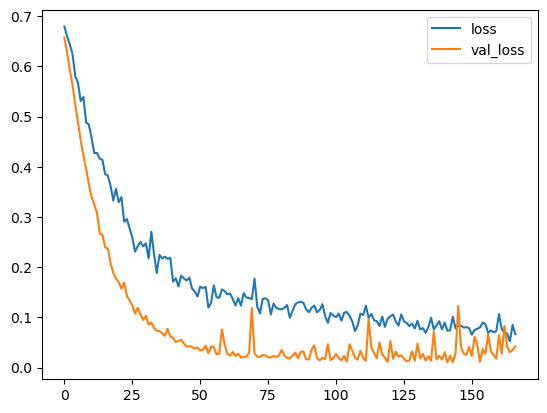

In [29]:
losses_df = pd.DataFrame(modelWithDO.history.history)
losses_df.plot()

We can see that both `loss` and `val_loss` are decreasing almost together and flattening out. This is a great improvment from our original model.


# Model Evaluation

In [30]:
y_predict = modelWithDO.predict(x_test_scaled)

4/4 [==============================] - 0s 7ms/step


In [31]:
convertedPred = (y_predict > 0.5).astype('int32')
convertedPred

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [32]:
print(classification_report(y_test,convertedPred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [33]:
print(confusion_matrix(y_test,convertedPred))

[[40  0]
 [ 1 73]]


There are about 2 points which are misclassified.